In [355]:
import pandas as pd
import numpy as np
import os
import random
import string
import matplotlib.pyplot as plt

In [356]:
%matplotlib inline
pd.set_option('display.max_columns', 64)
pd.set_option('display.max_rows', 100)

In [357]:
homePath = 'game'
trainPath = os.path.join(homePath, 'train.csv')
testPath = os.path.join(homePath, 'test.csv')
trainData = pd.read_csv(trainPath)
testData = pd.read_csv(testPath)

E:\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [358]:
# trainData['desc'].value_counts()

In [359]:
# testData.head(5)

In [360]:
corrMatrix = trainData.corr()
corrMatrix['acc_now_delinq'].sort_values(ascending=False)

acc_now_delinq                 1.000000
total_acc                      0.027241
int_rate                       0.027073
tot_cur_bal                    0.023586
collections_12_mths_ex_med     0.020847
member_id                      0.018127
annual_inc                     0.015529
total_cu_tl                    0.015045
out_prncp                      0.013840
out_prncp_inv                  0.013830
mths_since_rcnt_il             0.012579
total_bal_il                   0.012246
total_rev_hi_lim               0.009179
installment                    0.007723
funded_amnt_inv                0.005468
funded_amnt                    0.005268
loan_amnt                      0.005155
dti                            0.003400
total_rec_late_fee             0.003357
total_rec_int                  0.002578
recoveries                     0.000475
collection_recovery_fee        0.000203
tot_coll_amt                   0.000083
pub_rec                        0.000069
revol_bal                     -0.000857


In [361]:
# trainData.describe()

In [362]:
# trainData.info()

In [363]:
# trainData.hist(bins=50, figsize=(50, 50))

In [364]:
trainLabel = trainData['acc_now_delinq']
trainData.drop('acc_now_delinq', axis=1, inplace=True)
# allData = trainData.append(testData)
allData = pd.concat([trainData, testData], axis=0, ignore_index=True)

In [365]:
termData = allData['term']
termData = termData.str.split(' ', n=2, expand=True)[1]
termData = list(map(int, termData))
allData['term'] = termData
allData['term'].value_counts()

36    621125
60    266254
Name: term, dtype: int64

In [366]:
gradeData = allData['grade']
gradeData.replace(['A','B','C','D','E','F','G'], [7,6,5,4,3,2,1],inplace=True)
allData['grade'] = gradeData
allData['grade'].value_counts()

6    254535
5    245860
7    148202
4    139542
3     70705
2     23046
1      5489
Name: grade, dtype: int64

In [367]:
subGradeData = allData['sub_grade']
subGradeData.replace(['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'],
                    [35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], inplace=True)
allData['sub_grade'] = subGradeData
allData['sub_grade'].value_counts()

28    56323
27    55626
25    53387
24    52236
23    50161
22    48857
26    48833
29    48781
30    44972
31    44816
21    41219
20    36238
32    34531
19    29803
18    26554
17    25558
33    23457
35    22913
34    22485
16    21389
15    18268
14    17004
13    14134
12    11724
11     9575
10     7218
9      5392
8      4433
7      3409
6      2594
5      1871
4      1398
3       981
2       663
1       576
Name: sub_grade, dtype: int64

In [368]:
empLen = allData['emp_length'].value_counts()

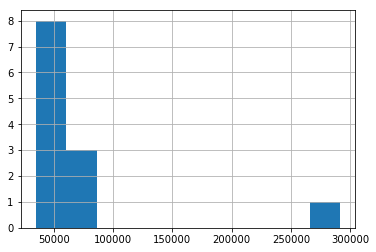

In [369]:
empLen.hist()

In [370]:
empLen

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [371]:
empLengthData = allData['emp_length']
empLengthData.replace(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'n/a'],
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0], inplace=True)

In [372]:
empLengthData.value_counts()

11    291569
3      78870
1      70605
4      70026
2      57095
6      55704
5      52529
0      44825
8      44594
9      43955
7      42950
10     34657
Name: emp_length, dtype: int64

In [373]:
allData['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [374]:
allData['home_ownership'].replace(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'], [443557, 356117, 87470, 182, 50, 3], inplace=True)

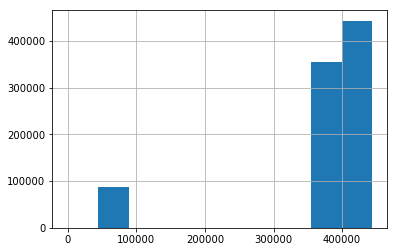

In [375]:
allData['home_ownership'].hist()

In [376]:
allData['verification_status'].value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [377]:
allData['verification_status'].replace(['Source Verified', 'Verified', 'Not Verified'], [329558, 291071, 266750], inplace=True)

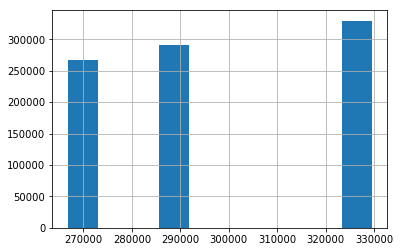

In [378]:
allData['verification_status'].hist()

In [379]:
# allData['issue_d'].value_counts()

In [380]:
issueDData = allData['issue_d']
issueDValueDict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
issueDValue = list()
for issueD in issueDData:
    issueSplit = issueD.split('-')
    month = issueDValueDict[issueSplit[0]]
    year = int(issueSplit[1])
    issueDValue.append(year*100 + month)
allData['issue_d'] = issueDValue

In [381]:
allData['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [382]:
allData['loan_status'].replace(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Issued', 'In Grace Period',
                                'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid',
                               'Default', 'Does not meet the credit policy. Status:Charged Off'], [601779, 207723, 45248, 11591, 8460, 6253,
                                                                                                   2357, 1988, 1219, 761], inplace=True)
allData['loan_status'].value_counts()


601779    601779
207723    207723
45248      45248
11591      11591
8460        8460
6253        6253
2357        2357
1988        1988
1219        1219
761          761
Name: loan_status, dtype: int64

In [383]:
# allData['pymnt_plan'].value_counts()

In [384]:
allData['pymnt_plan'].replace(['n', 'y'], [0, 1], inplace=True)

In [385]:
# allData['pymnt_plan'].value_counts()

In [386]:
# allData['purpose'].value_counts()

In [387]:
allData['purpose'].replace(['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase', 'small_business', 'car',
                            'medical', 'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 'educational'], [524215, 206182, 51829,
                                42894, 17277, 10377, 8863, 8540, 5414, 4736, 3707, 2347, 575, 423], inplace=True)

In [388]:
# allData['purpose'].value_counts()

In [389]:
allData.drop('desc', axis=1, inplace=True)

In [390]:
# allData['title'].value_counts()

In [391]:
# empTitleData = np.array(allData['emp_title'])
# empTitleData2 = list(allData['emp_title'])
# empList = list(empTitleData)
# empSet = set(empList)
# empLabel = empSet.pop()
# times = 0
# for i in empSet:
#     local = np.where(empTitleData == i)
#     counts = empTitleData2.count(i)
#     for j in local:
#         empTitleData[j] = counts
#     times = times + 1
#     print(times)


In [392]:
# titleData = np.array(allData['title'])
# titleData2 = list(allData['title'])
# titleSet = set(titleData2)
# times = 0
# for i in titleSet:
#     local = np.where(titleData == i)
#     counts = titleData2.count(i)
#     for j in local:
#         titleData[j] = counts
#     times = times + 1
#     print(times)
    
    



In [393]:
# title = pd.DataFrame(titleData)
# title.to_csv('title.csv', index=False)

In [394]:
# allData['zip_code'].value_counts()

In [395]:
# zipCodeData = np.array(allData['zip_code'])
# zipCodeData2 = list(allData['zip_code'])
# zipCodeData3 = allData['zip_code']
# zipCodeSet = set(zipCodeData2)
# t = 0
# for i in zipCodeSet:
#     local = np.where(zipCodeData == i)
#     count = zipCodeData2.count(i)
#     zipCodeData3.loc[local] = count
#     t += 1
#     print(t)


In [396]:
zipCodeData3.to_csv('zipcode.csv', index=False)

In [397]:
# allData['addr_state'].value_counts()

In [398]:
addrStateData = np.array(allData['addr_state'])
addrStateData2 = list(allData['addr_state'])
addrStateSet= set(addrStateData2)
addrStateData3 = allData['addr_state']
t = 0
for i in addrStateSet:
    local = np.where(addrStateData == i)
    count = addrStateData2.count(i)
    addrStateData3.loc[local] = count
    t += 1
#     print(t)

E:\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [399]:
allData['addr_state'] = addrStateData3
# allData['addr_state'].value_counts()

In [400]:
# allData['earliest_cr_line'].value_counts()

In [401]:
# allData.info()

In [405]:
earliestCrLineData = allData['earliest_cr_line']
earliestCrLineData = earliestCrLineData.fillna('Sep-99999990')
earliestCrLineDict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
earliestCrLineValue = list()
for ecl in earliestCrLineData:
    eclSplit = ecl.split('-')
    eclMonth = earliestCrLineDict[eclSplit[0]]
    eclYear = int(eclSplit[1])
    earliestCrLineValue.append(eclYear*100 + eclMonth)

allData['earliest_cr_line'] = pd.DataFrame(earliestCrLineValue)
print('ok')
allData['earliest_cr_line'].value_counts()

ok


200108    6659
200008    6529
200010    6322
200110    6154
200208    6086
200009    5918
199911    5878
199910    5824
200011    5822
200209    5812
200210    5684
200109    5678
200309    5612
199908    5598
199909    5588
200107    5330
200111    5223
200310    5212
200308    5205
200103    5173
199809    5141
200012    5103
200409    5075
200105    5067
200112    5046
199912    5019
200007    4997
199810    4946
200106    4930
200003    4906
200207    4863
200005    4829
200006    4816
200101    4774
200307    4742
200104    4714
199812    4712
199811    4710
200408    4655
199808    4654
200002    4613
200205    4567
200211    4541
199907    4491
200410    4487
200001    4469
199903    4460
200201    4430
200203    4417
199710    4413
          ... 
196302       2
196009       2
195504       2
195807       2
195001       2
195505       2
195609       2
195008       2
194401       2
195301       2
196106       2
195401       2
195902       2
195611       2
195411       2
196105    

In [407]:
allData['initial_list_status'].value_counts()

f    456848
w    430531
Name: initial_list_status, dtype: int64

In [408]:
allData['initial_list_status'].replace(['f','w'], [1, 0], inplace=True)
allData['initial_list_status'].value_counts()

1    456848
0    430531
Name: initial_list_status, dtype: int64

In [409]:
allData['application_type'].value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

In [410]:
allData['application_type'].replace(['INDIVIDUAL', 'JOINT'], [886868, 511], inplace=True)
allData['application_type'].value_counts()

886868    886868
511          511
Name: application_type, dtype: int64

In [411]:
allData['verification_status_joint'].value_counts()

Not Verified       283
Verified           167
Source Verified     61
Name: verification_status_joint, dtype: int64

In [412]:
allData['verification_status_joint'].replace(['Not Verified', 'Verified', 'Source Verified'], [283, 167, 61], inplace=True)
allData['verification_status_joint'].value_counts()

283.0    283
167.0    167
61.0      61
Name: verification_status_joint, dtype: int64